In [32]:
!pip install aguaclara

In [0]:
import aguaclara as ac
from aguaclara.core.units import unit_registry as u
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [96]:
basepath = "https://raw.githubusercontent.com/monroews/Plant_Performance/master/"
plants = ['Jesus_de_Otoro','La_Concordia','San_Rafael_del_Norte']
print(basepath+plants[0]+'.tsv')
pddata = [pd.read_csv(basepath+i+'.tsv',sep='\t') for i in plants]
#pddata = [pd.read_csv(basepath+i+'.tsv',sep='\t') for i in plants]


https://raw.githubusercontent.com/monroews/Plant_Performance/master/Jesus_de_Otoro.tsv


In [98]:
i = 2
print(plants[i])
pddata[i].head(3)

San_Rafael_del_Norte


,time,operator,flow (L/s),raw (NTU),sed (NTU),filter1 (NTU),filter2 (NTU),filter (NTU),Cuagulante,coag (mg/L),Cloro,Cl (mg/L),backwash1,backwash2,Observaciones,Unnamed: 15
0,5/29/2018 1:00,Sergio Torrez,7,13,2.9,NaN,NaN,#DIV/0!,111.11,12,NaN,NaN,txt,txt,txt,NaN
1,5/29/2018 2:00,Sergio Torrez,7,10.3,1.8,NaN,NaN,#DIV/0!,111.11,11.11,NaN,NaN,NaN,NaN,NaN,NaN
2,5/29/2018 3:00,Sergio Torrez,7,9.2,1.58,NaN,NaN,#DIV/0!,111.11,11.11,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
font = 'xx-large'
params = {'legend.fontsize': font,
         'figure.figsize': (8,6),
         'axes.labelsize': font,
         'axes.titlesize':font,
         'xtick.labelsize':font,
         'ytick.labelsize':font,
         'axes.formatter.useoffset':False}
plt.rcParams.update(params)

f = ticker.ScalarFormatter()
f.set_scientific(True)

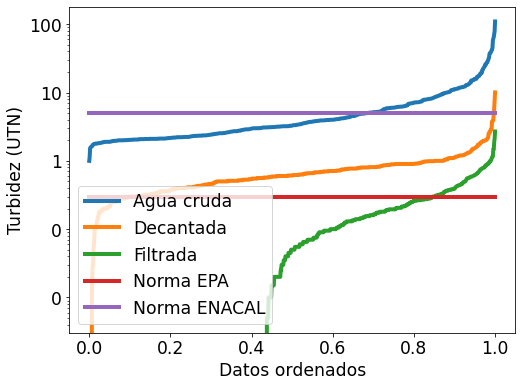

Jesus_de_Otoro


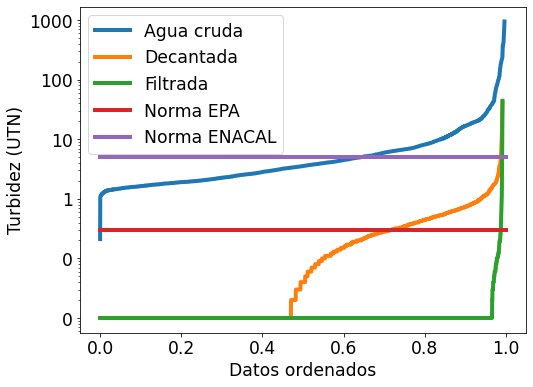

La_Concordia


KeyError: ignored

In [99]:
for i in range(len(plants)):
  raw = np.sort(pddata[i]['raw (NTU)']) * u.NTU
  sed = np.sort(pddata[i]['sed (NTU)']) * u.NTU
  filter = np.sort(pddata[i]['filter (NTU)']) * u.NTU
  count = raw.shape[0]
  rank = np.linspace(0,1,count,endpoint=True)
  fig, ax = plt.subplots()
  ax.plot(rank,raw,linewidth=4)
  ax.plot(rank,sed,linewidth=4)
  ax.plot(rank,filter,linewidth=4)
  ax.plot([0,1],[0.3,0.3],linewidth=4)
  ax.plot([0,1],[5,5],linewidth=4)
  ax.set_ylabel('Turbidez (UTN)')
  ax.set_xlabel('Datos ordenados')
  ax.set_yscale('log')
  ax.legend(['Agua cruda','Decantada','Filtrada','Norma EPA','Norma ENACAL'])
  ax.yaxis.set_major_formatter(f)
  plt.show()
  print(plants[i])

In [0]:
Cd_raw = np.sort(Concordia_data['UTM Entrada']) * u.NTU
Cd_sed = np.sort(Concordia_data['UTM Sed']) * u.NTU
Cd_filter = np.sort(Concordia_data['UTM Filtro ']) * u.NTU
Cd_count = Cd_raw.shape[0]
print(Cd_count)
Cd_rank = np.linspace(0,1,Cd_count,endpoint=True)

SR_raw = np.sort(SanRafael_data[' Entrada']) * u.NTU
SR_sed = np.sort(SanRafael_data['SEDI']) * u.NTU
SR_filter = np.sort(SanRafael_data[' Filtro # 1']) * u.NTU
SR_count = SR_raw.shape[0]
print(SR_count)
SR_rank = np.linspace(0,1,SR_count,endpoint=True)


2862
1972


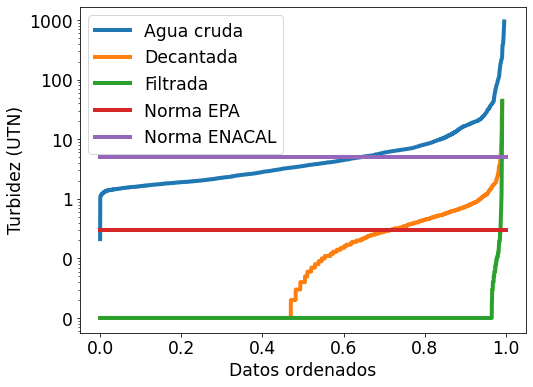

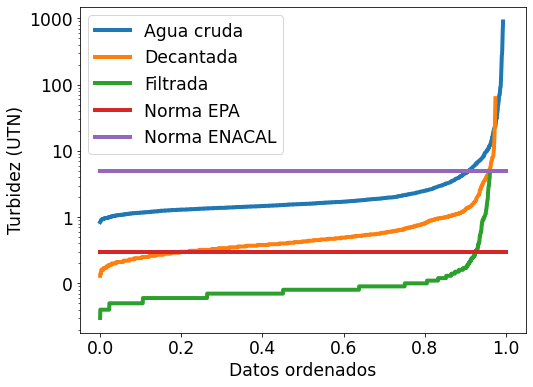

In [0]:
font = 'xx-large'
params = {'legend.fontsize': font,
         'figure.figsize': (8,6),
         'axes.labelsize': font,
         'axes.titlesize':font,
         'xtick.labelsize':font,
         'ytick.labelsize':font,
         'axes.formatter.useoffset':False}
plt.rcParams.update(params)


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

f = ticker.ScalarFormatter()
f.set_scientific(False)

fig, ax = plt.subplots()

ax.plot(Cd_rank,Cd_raw,linewidth=4)
ax.plot(Cd_rank,Cd_sed,linewidth=4)
ax.plot(Cd_rank,Cd_filter,linewidth=4)
ax.plot([0,1],[0.3,0.3],linewidth=4)
ax.plot([0,1],[5,5],linewidth=4)
ax.set_ylabel('Turbidez (UTN)')
ax.set_xlabel('Datos ordenados')
ax.set_yscale('log')
ax.legend(['Agua cruda','Decantada','Filtrada','Norma EPA','Norma ENACAL'])
ax.yaxis.set_major_formatter(f)
plt.show()

fig, ax = plt.subplots()

ax.plot(SR_rank,SR_raw,linewidth=4)
ax.plot(SR_rank,SR_sed,linewidth=4)
ax.plot(SR_rank,SR_filter,linewidth=4)
ax.plot([0,1],[0.3,0.3],linewidth=4)
ax.plot([0,1],[5,5],linewidth=4)
ax.set_ylabel('Turbidez (UTN)')
ax.set_xlabel('Datos ordenados')
ax.set_yscale('log')
ax.legend(['Agua cruda','Decantada','Filtrada','Norma EPA','Norma ENACAL'])
ax.yaxis.set_major_formatter(f)
plt.show()